### Install Codebase & Depedencies

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.8
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2

!sudo apt-get install python3.8-distutils
!sudo apt install python3-pip
!sudo apt-get install git
!python -m pip install --upgrade pip
!python -m pip install ipykernel

!python --version

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,136 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,244 kB]
Get:13 https://ppa.launchpadcontent.net/grap

In [ ]:
!python3 -m pip install -e .

Obtaining file:///content/MARL-Drones
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for matplotlib<4.0,>=3.5 from https://files.pythonhosted.org/packages/b4/c2/f74e0deb26379aead0956a6ecf9acd4587debba0c7abe4bd8fe53fe04ec2/matplotlib-3.7.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata
  Obtaining dependency information for numpy<2.0,>=1.22 from https://files.pythonhosted.org/packages/98/5d/5738903efe0ecb73e51eb44feafba32bdba2081263d40c5043568ff60faf/numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


### Single Agent

In [ ]:
gui=False
record_video=True
n_gpu = 1
algo_type = "hover"
action_type = "pid"

!python scripts/learning/singleagent_ddpg.py \
  --env=$algo_type \
  --act=$action_type \
  --record_video=$record_video \
  --gui=$gui

pybullet build time: May 20 2022 19:44:17
[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000
/usr/local/lib/python3.8/dist-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
(DDPG pid=7961) [INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
(DDPG pid=7961) [INFO] m 0.027000, L 0.039700,
(DDPG pid=7961) [INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
(DDPG pid=7961) [INFO] kf 0.000000, km 0.000000,
(DDPG pid=7961) [INFO] t2w 2.250000, max_speed_kmh 30.000000,
(DDPG pid=7961) [INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
(DDPG pid=7961) [INFO]

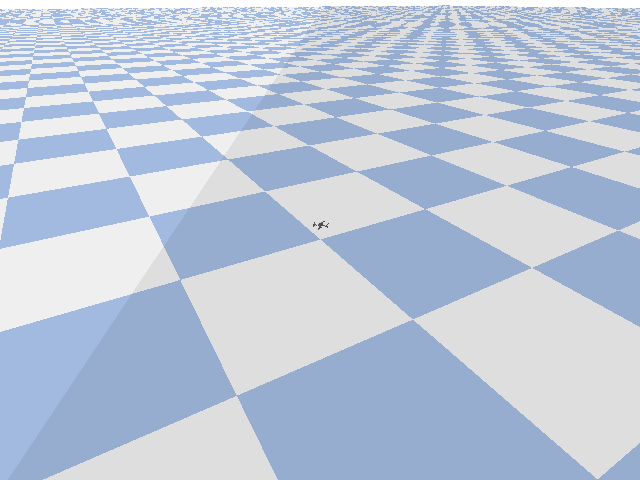

In [ ]:
output = None
if record_video:
  # Display simulation result
  import glob
  import os
  from PIL import Image as pilImage

  def make_gif(frame_folder):
      frames = []
      try:
        i = 0
        while i > -1:
          frames += [pilImage.open(os.path.join(f"{frame_folder}", f"frame_{i}.png"))]
          i+=1
      except Exception as e:
        pass

      frame_one = frames[0]
      frame_one.save("example_output.gif", format="GIF", append_images=frames,
                save_all=True, duration=3000//len(frames), loop=0)

  videos = glob.glob('/content/MARL-Drones/experiments/learning/results/recording_*/')
  videos.sort()
  make_gif(videos[-1])

  from IPython.display import Image as ipyImage
  output = ipyImage(open('example_output.gif','rb').read())
output

### Multi Agent

In [ ]:
!mkdir -p ./experiments/learning/results

In [ ]:
gui=False
record_video=True
num_drones = 2
n_gpu = 0
algo_type = "flock"

!RLLIB_NUM_GPUS=$n_gpu \
  python scripts/learning/multiagent_ddpg.py \
  --env $algo_type \
  --num_drones $num_drones \
  --record_video=$record_video \
  --gui=$gui

pybullet build time: May 20 2022 19:44:17
[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000
/usr/local/lib/python3.8/dist-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
(DDPG pid=7606) pybullet build time: May 20 2022 19:44:17
(DDPG pid=7606) 2023-08-21 13:55:43,547	WARNING ddpg.py:186 -- Setting use_state_preprocessor=True since a custom model was specified.
(DDPG pid=7606) 2023-08-21 13:55:43,548	INFO trainer.py:743 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(DDPG pid=7606) /usr/local/lib/pyt

In [ ]:
colab=True
gui=False
record_video=True
result_folder="./results/save-flock-2-cc-kin-rpm-08.21.2023_13.55.36"

!python scripts/learning/test_multiagent_ddpg.py \
  --exp $result_folder \
  --record_video=$record_video \
  --gui=$gui \
   --colab=$colab

pybullet build time: May 20 2022 19:44:17
[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000
/usr/local/lib/python3.8/dist-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
2023-08-21 13:59:44,609	WARNING ddpg.py:186 -- Setting use_state_preprocessor=True since a custom model was specified.
[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,

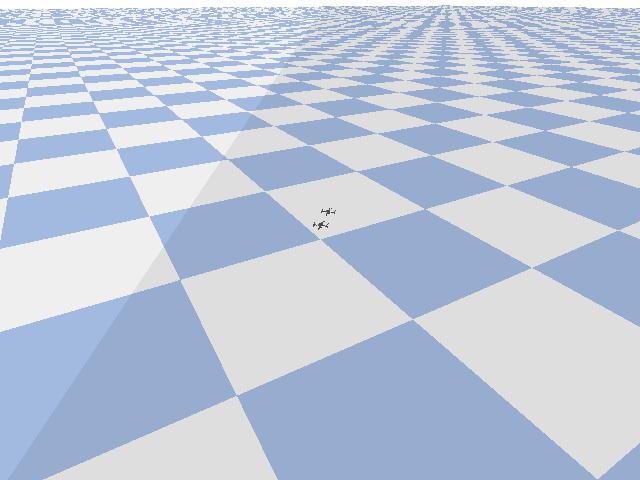

In [ ]:
output = None
if record_video:
  # Display simulation result
  import glob
  import os
  from PIL import Image as pilImage

  def make_gif(frame_folder):
      frames = []
      try:
        i = 0
        while i > -1:
          frames += [pilImage.open(os.path.join(f"{frame_folder}", f"frame_{i}.png"))]
          i+=1
      except Exception as e:
        pass

      frame_one = frames[0]
      frame_one.save("example_output.gif", format="GIF", append_images=frames,
                save_all=True, duration=3000//len(frames), loop=0)

  videos = glob.glob('/content/MARL-Drones/scripts/learning/results/recording_*/')
  videos.sort()
  make_gif(videos[-1])

  from IPython.display import Image as ipyImage
  output = ipyImage(open('example_output.gif','rb').read())
output